<a href="https://colab.research.google.com/github/rajubaddela1234/Deep_Learning/blob/main/ineuron_Deep_learning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [28]:
!nvidia-smi

Sat Aug 12 14:54:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    26W /  70W |    389MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [30]:
x= pd.DataFrame(housing.data, columns= housing.feature_names)
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [31]:
y = pd.DataFrame(housing.target, columns=['target'])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [32]:
x.shape

(20640, 8)

In [33]:
y.shape

(20640, 1)

In [34]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x,y, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full,y_train_full, random_state=42)

In [35]:
print(x_train_full.shape)
print(x_test.shape)
print(x_train.shape)
print(x_valid.shape)

(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


In [36]:
LAYERS = [
         tf.keras.layers.Dense(30, activation="relu", input_shape = x_train.shape[1:]),
         tf.keras.layers.Dense(10, activation="relu"),
         tf.keras.layers.Dense(5, activation='relu'),
         tf.keras.layers.Dense(1)

]

In [37]:
model = tf.keras.models.Sequential(LAYERS)

In [38]:
# # For calculating accuracy score (r2 score)
# from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [39]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[coeff_determination])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                270       
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [41]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [42]:
EPOCHS = 5

history = model.fit( x_train, y_train, epochs= EPOCHS, validation_data=(x_valid, y_valid))

Epoch 1/5
363/363 [==============================] - 8s 4ms/step - loss: 1.5982 - coeff_determination: -0.2280 - val_loss: 1.0737 - val_coeff_determination: 0.1575
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.8241 - coeff_determination: 0.3662 - val_loss: 0.8314 - val_coeff_determination: 0.2941
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.5927 - coeff_determination: 0.5357 - val_loss: 0.4883 - val_coeff_determination: 0.6076
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4493 - coeff_determination: 0.6483 - val_loss: 0.4086 - val_coeff_determination: 0.6674
Epoch 5/5
363/363 [==============================] - 2s 5ms/step - loss: 0.4034 - coeff_determination: 0.6828 - val_loss: 0.3833 - val_coeff_determination: 0.6870


In [43]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,1.598168,-0.227980,1.073650,0.157506
1,0.824110,0.366214,0.831396,0.294115
2,0.592684,0.535747,0.488260,0.607640
3,0.449310,0.648337,0.408643,0.667361
4,0.403403,0.682763,0.383284,0.687025


<Axes: >

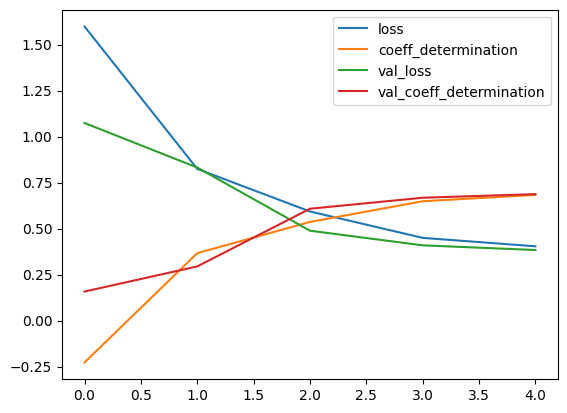

In [44]:
pd.DataFrame(history.history).plot()

In [46]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.4012 - coeff_determination: 0.6738


[0.40115535259246826, 0.6738343238830566]

In [47]:
x_test.shape

(5160, 8)

In [48]:
new = x_test[0]

In [49]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [50]:
new.reshape((1,8))

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ]])

In [51]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 81ms/step


array([[0.6517608]], dtype=float32)